In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import seaborn as sb
import sklearn as skl
import time
import statistics
from IPython.display import display, clear_output

import sklearn
from sklearn import pipeline      # Pipeline
from sklearn import preprocessing # OrdinalEncoder, LabelEncoder
from sklearn import impute
from sklearn import compose
from sklearn import model_selection # train_test_split
from sklearn.model_selection import train_test_split
from sklearn import metrics         # accuracy_score, balanced_accuracy_score, plot_confusion_matrix
from sklearn import set_config

set_config(display='diagram') # Useful for display the pipeline

print("Pandas  ", pd.__version__)
print("Sklearn ", skl.__version__) # Try to use 0.24

Pandas   1.2.4
Sklearn  0.24.2


In [3]:
df = pd.read_csv('heart.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [ ]:
#  Split into Test and Training Data
X_train, X_test, y_train, y_test = train_test_split(
        df.drop('target', 1), 
        df['target'], 
        test_size = 0.3, 
        random_state=10
        )

# Columns

- age - age in years

- sex - sex (1 = male; 0 = female)

- cp - chest pain type (1 = typical angina; 2 = atypical angina; 3 = non-anginal pain; 4 = asymptomatic)

- trestbps - resting blood pressure (in mm Hg on admission to the hospital)

- chol - serum cholestoral in mg/dl

- fbs - fasting blood sugar > 120 mg/dl (1 = true; 0 = false)

- restecg - resting electrocardiographic results (0 = normal; 1 = having ST-T; 2 = hypertrophy)

- thalach - maximum heart rate achieved

- exang - exercise induced angina (1 = yes; 0 = no)

- oldpeak - ST depression induced by exercise relative to rest

- slope - the slope of the peak exercise ST segment (1 = upsloping; 2 = flat; 3 = downsloping)

- ca - number of major vessels (0-3) colored by flourosopy

- thal - 3 = normal; 6 = fixed defect; 7 = reversable defect

- num (target) - the predicted attribute - diagnosis of heart disease (angiographic disease status) (Value 0 = < 50% diameter narrowing; Value 1 = > 50% diameter narrowing)

# Key data points

- cp - Look into angina types
- trestbps - Over certain limit (can be told from restecg with hypertrophy?)
- chol - Over certain limit
- fbs - 1(true)
- restecg - 1 or 2. ST-T is 1, this is most important
- thalach - Over certain limit
- exang - 1 means they had symptoms from exercise, 0 means it wasnt exercise induced. We look for 0
- oldpeak - What ST?
- slope - What is ST?
- ca - What is flourosopy?
- thal - 7 (maybe 6 aswell?)
- target - 1 means high chance of heart attack

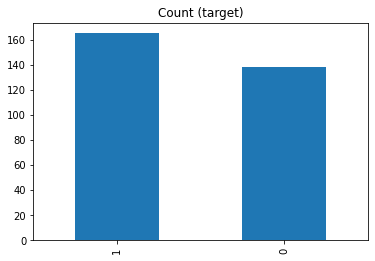

In [ ]:
df['target'].value_counts().plot(kind='bar', title='Count (target)');

In [ ]:
#Check Missing
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
slope       0
ca          0
thal        0
target      0
exang       0
oldpeak     0
dtype: int64

<AxesSubplot:>

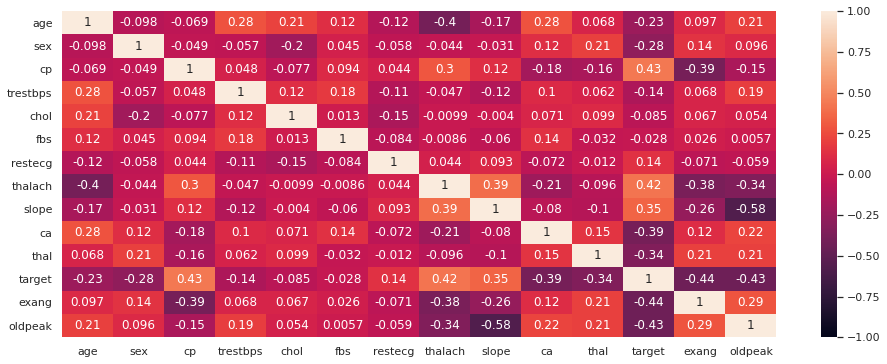

In [ ]:
# Correlation heatmap

plt.figure(figsize=(16, 6))

heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)
heatmap

/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='target', ylabel='thalach'>

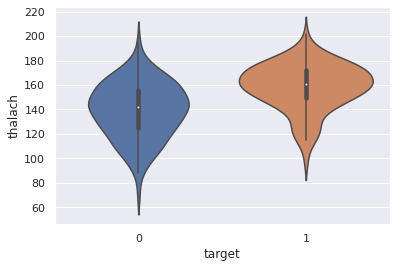

In [ ]:
sns.violinplot(df['target'], df['thalach'])

'''
RESULT
155+ indicated high chance of heart attack
130 - 150 shows high survival
'''

/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='target', ylabel='cp'>

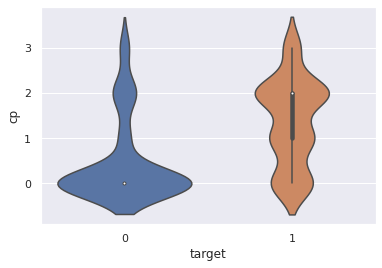

In [ ]:
sns.violinplot(df['target'], df['cp'])

'''
RESULT
0 = Survive
1 = Heart attack
2 = Highest chance of heart attack
3 = Heart attack
'''

/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='target', ylabel='slope'>

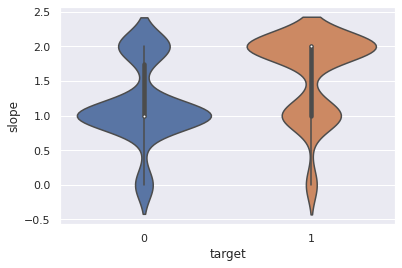

In [ ]:
sns.violinplot(df['target'], df['slope'])

'''
RESULT
0 = Rare
1 = High chance of survival
2 = High chance of heart attack
'''

<BarContainer object of 303 artists>

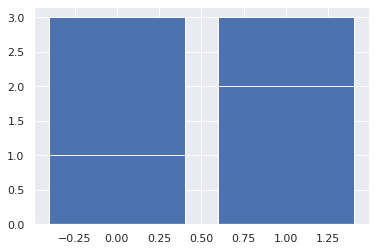

In [ ]:
plt.bar(df['target'], df['cp'])

In [ ]:
# Make new column of data
cols = df.columns.tolist()
cols=cols[:8]+cols[-2:]+cols[8:-2]
df = df[cols]
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,thal,target,exang,oldpeak,slope,ca
0,63,1,3,145,233,1,0,150,1,1,0,2.3,0,0
1,37,1,2,130,250,0,1,187,2,1,0,3.5,0,0
2,41,0,1,130,204,0,0,172,2,1,0,1.4,2,0
3,56,1,1,120,236,0,1,178,2,1,0,0.8,2,0
4,57,0,0,120,354,0,1,163,2,1,1,0.6,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,3,0,1,0.2,1,0
299,45,1,3,110,264,0,1,132,3,0,0,1.2,1,0
300,68,1,0,144,193,1,1,141,3,0,0,3.4,1,2
301,57,1,0,130,131,0,1,115,3,0,1,1.2,1,1


In [ ]:
#FE using stat
X_train['sum'] = X_train.sum(numeric_only = True, axis=1)  # numeric_only= None is default
X_test['sum'] = X_test.sum(numeric_only = True,axis=1)
X_test['sum']

246    3031.6
183    2302.0
229    2559.2
126    2048.4
184    2314.4
        ...  
69     2252.0
21     2381.6
210    2289.6
78     2308.0
174    2153.6
Name: sum, Length: 91, dtype: float64

In [10]:
# added = np.array([])
# for col in df.columns:
#     added = np.append(added, np.random.randint(df[col].min(), df[col].max(), size=df.shape[0] // 2))
# added.shape

added = np.random.randint(df['age'].min(), df['age'].max(), size=df.shape[0] // 2)
added

array([40, 50, 68, 63, 52, 29, 38, 33, 68, 61, 37, 61, 70, 65, 35, 60, 61,
       58, 53, 38, 40, 49, 73, 39, 70, 29, 73, 33, 37, 49, 37, 39, 75, 47,
       68, 61, 67, 29, 40, 54, 64, 58, 71, 54, 32, 33, 51, 54, 61, 58, 62,
       45, 69, 75, 51, 69, 43, 43, 60, 38, 40, 74, 71, 57, 66, 29, 41, 35,
       39, 34, 75, 42, 67, 44, 70, 68, 52, 57, 44, 41, 38, 61, 58, 30, 70,
       33, 52, 48, 39, 53, 63, 58, 34, 53, 63, 46, 38, 46, 29, 65, 47, 62,
       53, 46, 53, 30, 52, 61, 68, 34, 55, 64, 52, 29, 35, 44, 32, 48, 61,
       36, 34, 66, 57, 71, 67, 52, 57, 34, 71, 44, 43, 42, 36, 62, 61, 54,
       39, 47, 59, 51, 46, 30, 54, 67, 51, 30, 65, 38, 34, 60, 50])

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=cd775439-f3d2-4e6d-9916-a56701a1b233' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>